#### Pavlo Yatluk
#### dz_44_1

### ЗАВДАННЯ

#### Використовуючи датасет з файлу train.csv, побудуйте діаграми розподілу для значень з поля «Age».


In [14]:
# імпорт бібліотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# імпорт датасету
train_df = pd.read_csv(r'C:\Users\Pavel\Documents\GitHub\PDS1\Lesson 44\train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
# Перевіримо заповненість значеннями колонки 'Age'
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [17]:
# так як колонка 'Age' заповнена значеннями не повністю (714 із 891) - дозаповнимо ії середніми значеннями і перевіримо результат
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# перевіримо на нормальність розподілення значень колонки 'Age' по тесту Шапіро-Вілка
from scipy.stats import shapiro
data = train_df['Age']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Прийняти гіпотезу нормальності')
else:
    print('Не прийняти гіпотезу нормальності')

stat=0.959, p=0.000
Не прийняти гіпотезу нормальності


In [19]:
# перевіримо на нормальність розподілення значень колонки 'Age' по тесту Д’Агостіно K^2
from scipy.stats import normaltest
data = train_df['Age']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Прийняти гіпотезу нормальності')
else:
    print('Не прийняти гіпотезу нормальності')

stat=43.859, p=0.000
Не прийняти гіпотезу нормальності


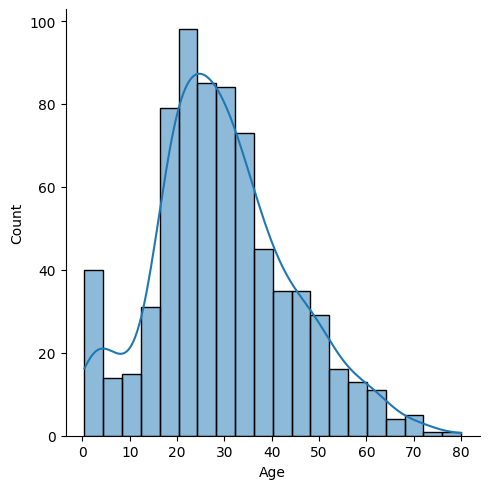

In [31]:
# оцінимо остаточно відсутність нормальності розподілення за допомогою візуалізації гістограми
sns.displot(data, x='Age', kde=True)

### Відповідь
#### Значення колонки 'Age' не являються нормально розподіленими.




### ЗАВДАННЯ
#### Заповніть пропущені значення в датасеті з файлу train.csv. Обґрунтуйте вибір способу заповнення пропущених значень

In [44]:
# Перевіримо заповненість датасету значеннями по колонках
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB
None


In [45]:
#  колонку 'Age' заповнимо середніми значеннями, так як ми не маємо додаткової інформації як вік впливає на виживаємість - Survived
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)

In [46]:
# колонку 'Cabin' заповнимо значеннями 0 - якщо вона відома і 1 - якщо невідома, так як у нас немає додаткової інформації як відомі номери кают, або їх відсутність вплинули на Survived 
train_df['Cabin'] = np.where(train_df['Cabin'].isnull(), 0, 1)

In [47]:
# колонку 'Sex' для можливості подальшої обробки значень заповнимо значеннями 0 - male і 1 - female
train_df['Sex'] = np.where(train_df['Sex'] == 'male', 0, 1)

In [48]:
# колонку 'Embarked' заповнимо значеннями, які зустріяаються частіше всого - S, так як кількість пропущених значень - всього 2
train_df.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [49]:
train_df['Embarked'].replace(np.nan, 'S', inplace = True)

In [50]:
# оновимо інформацію по колонкам таблиці
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


In [51]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,0
